<a href="https://colab.research.google.com/github/Siam9081/NLP-Projects/blob/main/MNIST_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)
import cv2

In [41]:
! wget 'https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image-300x298.png'


--2025-03-28 08:57:54--  https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image-300x298.png
Resolving machinelearningmastery.com (machinelearningmastery.com)... 104.26.1.148, 172.67.72.46, 104.26.0.148, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|104.26.1.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1747 (1.7K) [image/png]
Saving to: ‘sample_image-300x298.png.1’

sample_image-300x29 100%[===================>]   1.71K  --.-KB/s    in 0s      

2025-03-28 08:57:54 (23.8 MB/s) - ‘sample_image-300x298.png.1’ saved [1747/1747]

--2025-03-28 08:57:55--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4V_TMAoWiIqQbEwrZ2vXH025jMyvNNPo1kw&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.121.139, 108.177.121.113, 108.177.121.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.121.139|:443... connected.
HTTP request sent, awaiting response... 2

In [49]:
! wget 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkmY2zZGm2S-zTuV_vD9_XubHtz_J4azPtGg&s'

--2025-03-28 09:01:27--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkmY2zZGm2S-zTuV_vD9_XubHtz_J4azPtGg&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.121.113, 108.177.121.102, 108.177.121.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.121.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9236 (9.0K) [image/png]
Saving to: ‘images?q=tbn:ANd9GcSkmY2zZGm2S-zTuV_vD9_XubHtz_J4azPtGg&s’

images?q=tbn:ANd9Gc 100%[===================>]   9.02K  --.-KB/s    in 0s      

2025-03-28 09:01:27 (56.1 MB/s) - ‘images?q=tbn:ANd9GcSkmY2zZGm2S-zTuV_vD9_XubHtz_J4azPtGg&s’ saved [9236/9236]



In [ ]:
! wget 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8DaF97_6hF4ob8v5iLsnWFwwiGVko_a7hRHUr8rGqsJuQhFIinHddKLacbjJtzw_gBJU&usqp=CAU'

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print(np.unique(y_train))
print('\n', np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]

 [0 1 2 3 4 5 6 7 8 9]


In [8]:
X_train, X_test  = X_train / 255, X_test /255

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train,
          y_train,
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8511 - loss: 0.5223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9548 - loss: 0.1513
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9672 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9740 - loss: 0.0843
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9793 - loss: 0.0675
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9834 - loss: 0.0555
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9862 - loss: 0.0464
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0392
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9896 - loss: 0.0344
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0308


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1323


In [14]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [15]:
y_pred = [np.argmax(i) for i in y_pred]

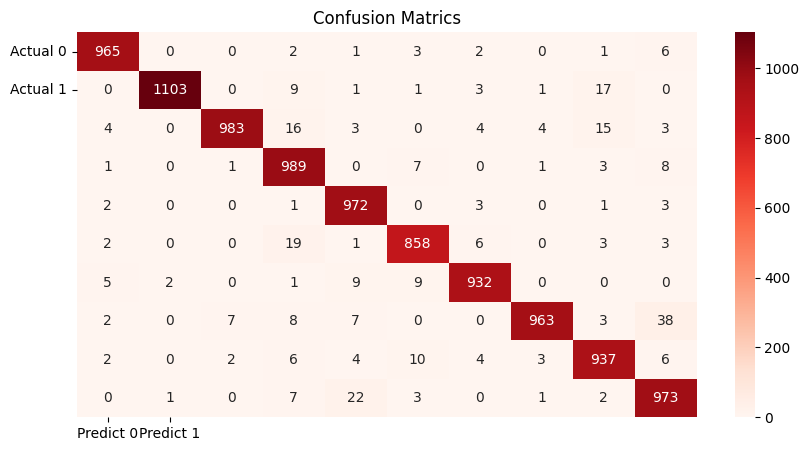

In [16]:
con_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predict 0', 'Predict 1'],
            yticklabels=['Actual 0','Actual 1']
            )
plt.title('Confusion Matrics')
plt.show()

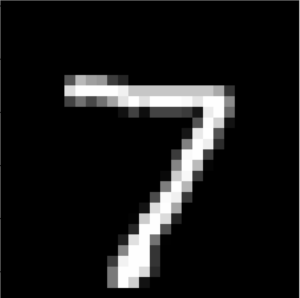

In [23]:
img1 =  cv2.imread('/content/sample_image-300x298.png')
cv2_imshow(img1)

In [24]:
img2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

In [25]:
img3 = cv2.resize(img2,(28,28))

In [26]:
img4=  img3 / 255

In [29]:
img5 = np.reshape(img4,[1,28,28])

In [32]:
 i = model.predict(img5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [33]:
print(np.argmax(i))

7


Input imgae path :/content/sample_image-300x298.png.1


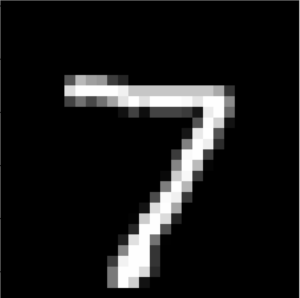

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

 The prediction result is :  7


In [54]:
path = input('Input imgae path :')
read_img = cv2.imread(path)
cv2_imshow(read_img)
gray_img = cv2.cvtColor(read_img, cv2.COLOR_RGB2GRAY)
resize_img = cv2.resize(gray_img, (28,28))
resized_img = resize_img / 255.0
reshape_img = np.reshape(resized_img, [1,28,28])
predictions = model.predict(reshape_img)
result = np.argmax(predictions)
print('\n The prediction result is : ',result)

In [ ]:
|